In [2]:
# Source data: https://docs.google.com/spreadsheets/d/1Q6KiM2kosM1q1_NK-FzFjJ2o0mLS2YHe0sUkqTj6xbU/edit?gid=506716267#gid=506716267

import pandas as pd
from io import StringIO

data = """LLM,System,Rank,Score
qwen1.5-110B-Chat,LMC-EI (ours),1,65.6
gpt-4o-2024-05-13,LMC-EI (ours),2,59.2
claude-3-opus,LMC-EI (ours),3,50.1
qwen1.5-32B-Chat,LMC-EI (ours),4,50
llama-3-70b-chat,LMC-EI (ours),5,45.1
claude-3-haiku,LMC-EI (ours),6,38.6
mixtral-8x7b,LMC-EI (ours),7,34.4
llama-3-8b-chat,LMC-EI (ours),8,30
gpt-4-0613,LMC-EI (ours),9,44.2
qwen1.5-110B-Chat,Human Study,3,53
gpt-4o-2024-05-13,Human Study,2,54
claude-3-opus,Human Study,1,55.7
qwen1.5-32B-Chat,Human Study,4,50
llama-3-70b-chat,Human Study,5,49.7
claude-3-haiku,Human Study,6,49
mixtral-8x7b,Human Study,7,48.9
llama-3-8b-chat,Human Study,9,40
gpt-4-0613,Human Study,8,43.9
gpt-4o-2024-05-13,Chatbot Arena,1,1287
gpt-4-0613,Chatbot Arena,3,1246
mixtral-8x7b,Chatbot Arena,9,1114
llama-3-70b-chat,Chatbot Arena,4,1208
llama-3-8b-chat,Chatbot Arena,7,1153
claude-3-opus,Chatbot Arena,2,1248
claude-3-haiku,Chatbot Arena,5,1178
qwen1.5-110B-Chat,Chatbot Arena,6,1164
qwen1.5-32B-Chat,Chatbot Arena,8,1126
gpt-4o-2024-05-13,MMLU,1,88.7
gpt-4-0613,MMLU,3,86.4
mixtral-8x7b,MMLU,8,70.6
llama-3-70b-chat,MMLU,4,82.0
llama-3-8b-chat,MMLU,9,68.4
claude-3-opus,MMLU,2,86.8
claude-3-haiku,MMLU,6,75.2
qwen1.5-110B-Chat,MMLU,5,80.2
qwen1.5-32B-Chat,MMLU,7,74.3
gpt-4o-2024-05-13,EQ-Bench,3,83.51
gpt-4-0613,EQ-Bench,1,84.79
mixtral-8x7b,EQ-Bench,7,72.37
llama-3-70b-chat,EQ-Bench,5,82.13
llama-3-8b-chat,EQ-Bench,8,68.88
claude-3-opus,EQ-Bench,4,82.19
claude-3-haiku,EQ-Bench,9,63.65
qwen1.5-110B-Chat,EQ-Bench,2,83.68
qwen1.5-32B-Chat,EQ-Bench,6,75.59
gpt-4o-2024-05-13,Chatbot Arena EQ,1,79.56
gpt-4-0613,Chatbot Arena EQ,9,30.87
mixtral-8x7b,Chatbot Arena EQ,8,37.62
llama-3-70b-chat,Chatbot Arena EQ,2,77.21
llama-3-8b-chat,Chatbot Arena EQ,4,53.69
claude-3-opus,Chatbot Arena EQ,5,50.66
claude-3-haiku,Chatbot Arena EQ,7,40.94
qwen1.5-110B-Chat,Chatbot Arena EQ,3,69.35
qwen1.5-32B-Chat,Chatbot Arena EQ,6,50"""

df = pd.read_csv(StringIO(data))

In [3]:
# Print correlations
pivot_df = df.pivot(index='LLM', columns='System', values='Score')
spearman_corr = pivot_df.corr(method='spearman')
kendall_tau_corr = pivot_df.corr(method='kendall')

# Reorder the matrix to have 'Human Study' last
system_order = ['EQ-Bench', 'Chatbot Arena', 'Chatbot Arena EQ', 'MMLU', 'LMC-EI (ours)', 'Human Study']
spearman_corr = spearman_corr.loc[system_order, system_order]
kendall_tau_corr = kendall_tau_corr.loc[system_order, system_order]
spearman_corr

System,EQ-Bench,Chatbot Arena,Chatbot Arena EQ,MMLU,LMC-EI (ours),Human Study
System,,,,,,
EQ-Bench,1.000000,0.550000,0.166667,0.716667,0.683333,0.383333
Chatbot Arena,0.550000,1.000000,0.366667,0.933333,0.483333,0.483333
Chatbot Arena EQ,0.166667,0.366667,1.000000,0.333333,0.533333,0.516667
MMLU,0.716667,0.933333,0.333333,1.000000,0.683333,0.650000
LMC-EI (ours),0.683333,0.483333,0.533333,0.683333,1.000000,0.883333
Human Study,0.383333,0.483333,0.516667,0.650000,0.883333,1.000000


<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_99255/2086016676.py:20: SyntaxWarning: invalid escape sequence '\m'
  annot.loc[i, j] = f'$\mathbf{{{value:.2f}}}$'
/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_99255/2086016676.py:33: SyntaxWarning: invalid escape sequence '\m'
  ax.set_yticklabels([f'$\mathbf{{{label}}}$' if label == 'Human Study' else label for label in labels], fontsize=font_size, rotation=0)


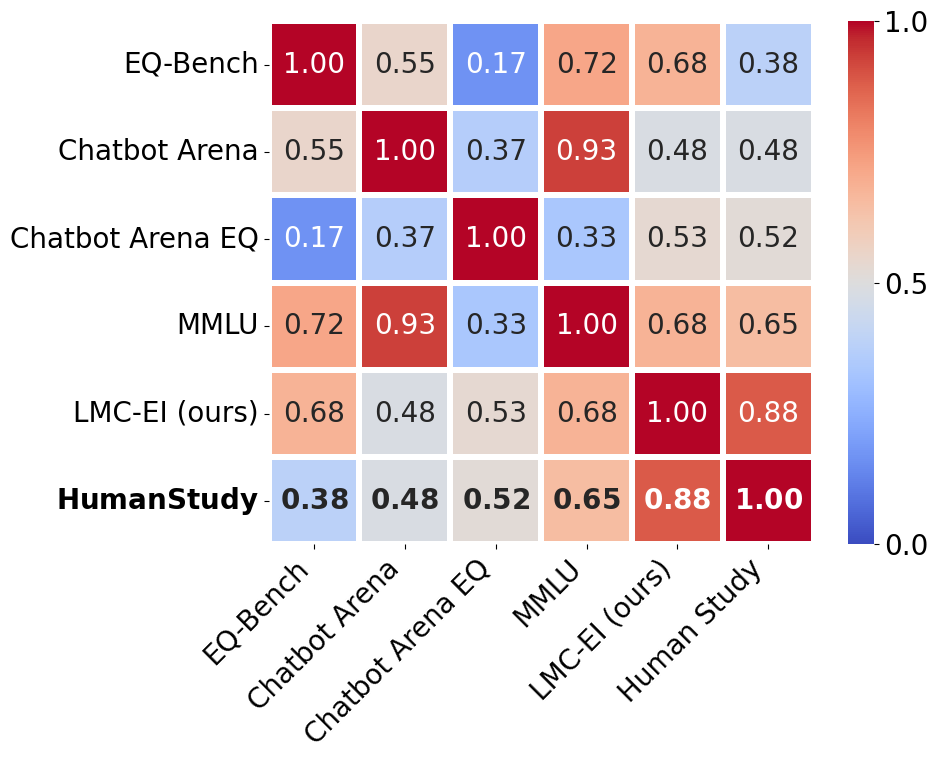

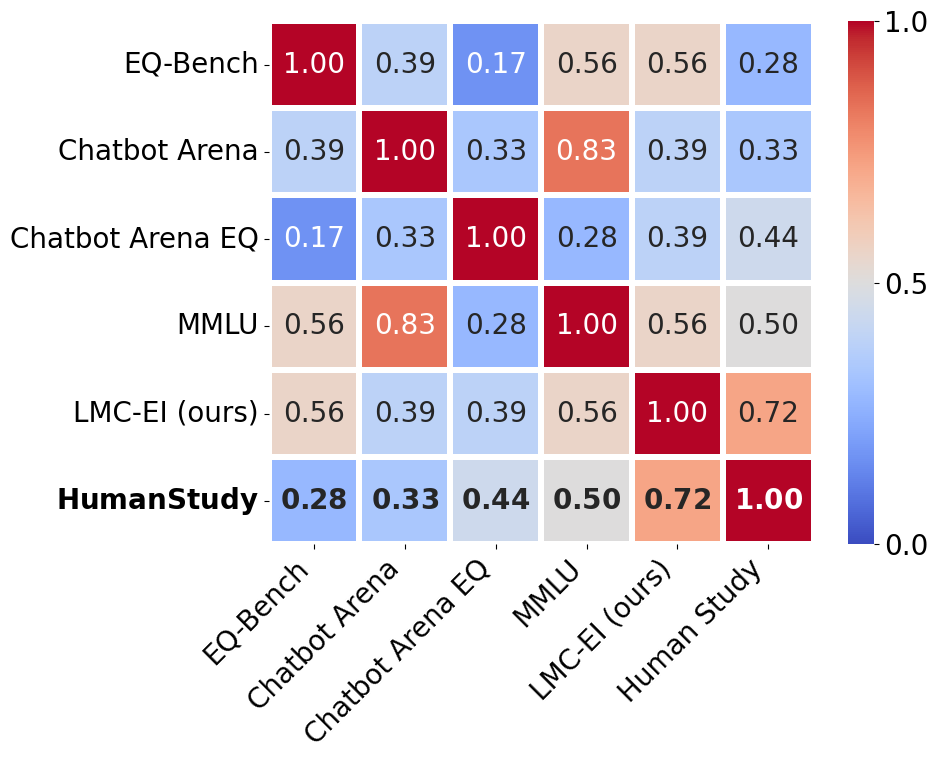

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_corr_matrix(df, corr_method):
    # Set global font size variable
    font_size = 20
    
    # Update global font size
    plt.rcParams.update({'font.size': font_size})
    
    # Create a custom annotation DataFrame
    annot = df.copy().astype(str)
    
    # Apply the custom style to the annotations
    for i in df.index:
        for j in df.columns:
            value = df.loc[i, j]
            if i == 'Human Study':
                annot.loc[i, j] = f'$\mathbf{{{value:.2f}}}$'
            else:
                annot.loc[i, j] = f'{value:.2f}'
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(df, annot=annot, cmap='coolwarm', linewidths=3, fmt='', vmin=0, vmax=1, center=0.5)
    
    # Modify the axis labels to bold "Human Study"
    ax = plt.gca()  # Get the current axis
    
    # Bold the 'Human Study' label on the y-axis
    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_yticklabels([f'$\mathbf{{{label}}}$' if label == 'Human Study' else label for label in labels], fontsize=font_size, rotation=0)
    
    # Customize colorbar to only show min, middle, and max values
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_ticks([0, 0.5, 1])  # Set the ticks for min, mid, and max
    colorbar.set_ticklabels(['0.0', '0.5', '1.0'])  # Customize tick labels
    
    # Ensure x and y tick labels use the defined font size
    plt.xticks(fontsize=font_size, rotation=45, ha='right')
    plt.yticks(fontsize=font_size, rotation=0)
    
    plt.xlabel("")
    plt.ylabel("")
    # plt.title(f"Ranking correlations across leaderboards ({corr_method})", pad=20)
    plt.tight_layout()
    # plt.savefig("/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison.png")
    plt.savefig(f"/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison_{corr_method}.pdf")
    plt.savefig(f"/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison_{corr_method}.png")
    plt.show()

# spearman_corr = spearman_corr.loc[system_order, system_order]
# kendall_tau_corr
plot_corr_matrix(spearman_corr, "spearman")
plot_corr_matrix(kendall_tau_corr, "kendall-tau")

## Individual Judges

In [13]:
# Source data: https://docs.google.com/spreadsheets/d/1Q6KiM2kosM1q1_NK-FzFjJ2o0mLS2YHe0sUkqTj6xbU/edit?gid=506716267#gid=506716267

import pandas as pd
from io import StringIO

data = """LLM,System,Rank,Score
qwen1.5-110B-Chat,Human Study,3,53
gpt-4o-2024-05-13,Human Study,2,54
claude-3-opus,Human Study,1,55.7
qwen1.5-32B-Chat,Human Study,4,50
llama-3-70b-chat,Human Study,5,49.7
claude-3-haiku,Human Study,6,49
mixtral-8x7b,Human Study,7,48.9
llama-3-8b-chat,Human Study,9,40
gpt-4-0613,Human Study,8,43.9
gpt-4o-2024-05-13,Chatbot Arena,1,1287
gpt-4-0613,Chatbot Arena,3,1246
mixtral-8x7b,Chatbot Arena,9,1114
llama-3-70b-chat,Chatbot Arena,4,1208
llama-3-8b-chat,Chatbot Arena,7,1153
claude-3-opus,Chatbot Arena,2,1248
claude-3-haiku,Chatbot Arena,5,1178
qwen1.5-110B-Chat,Chatbot Arena,6,1164
qwen1.5-32B-Chat,Chatbot Arena,8,1126
gpt-4o-2024-05-13,MMLU,1,88.7
gpt-4-0613,MMLU,3,86.4
mixtral-8x7b,MMLU,8,70.6
llama-3-70b-chat,MMLU,4,82.0
llama-3-8b-chat,MMLU,9,68.4
claude-3-opus,MMLU,2,86.8
claude-3-haiku,MMLU,6,75.2
qwen1.5-110B-Chat,MMLU,5,80.2
qwen1.5-32B-Chat,MMLU,7,74.3
gpt-4o-2024-05-13,EQ-Bench,3,83.5
gpt-4-0613,EQ-Bench,1,84.8
mixtral-8x7b,EQ-Bench,7,72.4
llama-3-70b-chat,EQ-Bench,5,82.1
llama-3-8b-chat,EQ-Bench,8,68.9
claude-3-opus,EQ-Bench,4,82.2
claude-3-haiku,EQ-Bench,9,63.7
qwen1.5-110B-Chat,EQ-Bench,2,83.7
qwen1.5-32B-Chat,EQ-Bench,6,75.6
gpt-4o-2024-05-13,Chatbot Arena EQ,1,79.56
gpt-4-0613,Chatbot Arena EQ,9,30.87
mixtral-8x7b,Chatbot Arena EQ,8,37.62
llama-3-70b-chat,Chatbot Arena EQ,2,77.21
llama-3-8b-chat,Chatbot Arena EQ,4,53.69
claude-3-opus,Chatbot Arena EQ,5,50.66
claude-3-haiku,Chatbot Arena EQ,7,40.94
qwen1.5-110B-Chat,Chatbot Arena EQ,3,69.35
qwen1.5-32B-Chat,Chatbot Arena EQ,6,50
qwen1.5-110B-Chat,llama-3-70b-chat,1,70.53
gpt-4o-2024-05-13,llama-3-70b-chat,2,65.38
llama-3-70b-chat,llama-3-70b-chat,3,56.36
claude-3-opus,llama-3-70b-chat,4,51.64
qwen1.5-32B-Chat,llama-3-70b-chat,5,50
claude-3-haiku,llama-3-70b-chat,6,38.66
llama-3-8b-chat,llama-3-70b-chat,7,29.77
mixtral-8x7b,llama-3-70b-chat,8,26.74
gpt-4-0613,llama-3-70b-chat,9,16.9
qwen1.5-110B-Chat,qwen1.5-110B-Chat,1,68.63
gpt-4o-2024-05-13,qwen1.5-110B-Chat,2,55.5
qwen1.5-32B-Chat,qwen1.5-110B-Chat,3,50
claude-3-opus,qwen1.5-110B-Chat,4,45.5
llama-3-70b-chat,qwen1.5-110B-Chat,5,35.78
mixtral-8x7b,qwen1.5-110B-Chat,6,31.68
claude-3-haiku,qwen1.5-110B-Chat,7,23.35
llama-3-8b-chat,qwen1.5-110B-Chat,8,19.58
gpt-4-0613,qwen1.5-110B-Chat,9,18.87
llama-3-70b-chat,llama-3-8b-chat,1,62.65
qwen1.5-110B-Chat,llama-3-8b-chat,2,58.53
gpt-4o-2024-05-13,llama-3-8b-chat,3,52.24
llama-3-8b-chat,llama-3-8b-chat,4,51.27
claude-3-opus,llama-3-8b-chat,5,50.92
qwen1.5-32B-Chat,llama-3-8b-chat,6,50
claude-3-haiku,llama-3-8b-chat,7,48.82
mixtral-8x7b,llama-3-8b-chat,8,43.03
gpt-4-0613,llama-3-8b-chat,9,33.23
qwen1.5-110B-Chat,gpt-4-0613,1,68
gpt-4o-2024-05-13,gpt-4-0613,2,59.25
qwen1.5-32B-Chat,gpt-4-0613,3,50
claude-3-opus,gpt-4-0613,4,43
llama-3-70b-chat,gpt-4-0613,5,38.12
claude-3-haiku,gpt-4-0613,6,28.19
mixtral-8x7b,gpt-4-0613,7,25.96
gpt-4-0613,gpt-4-0613,8,20.79
llama-3-8b-chat,gpt-4-0613,9,14.22
qwen1.5-110B-Chat,claude-3-opus,1,77
gpt-4o-2024-05-13,claude-3-opus,2,59.25
qwen1.5-32B-Chat,claude-3-opus,3,50
claude-3-opus,claude-3-opus,4,42.5
claude-3-haiku,claude-3-opus,5,35
llama-3-70b-chat,claude-3-opus,6,26.5
mixtral-8x7b,claude-3-opus,7,23.75
gpt-4-0613,claude-3-opus,8,18.14
llama-3-8b-chat,claude-3-opus,9,9
qwen1.5-110B-Chat,mixtral-8x7b,1,69.42
gpt-4o-2024-05-13,mixtral-8x7b,2,67.16
llama-3-70b-chat,mixtral-8x7b,2,67.16
claude-3-opus,mixtral-8x7b,3,63.81
qwen1.5-32B-Chat,mixtral-8x7b,4,50
llama-3-8b-chat,mixtral-8x7b,5,44.86
claude-3-haiku,mixtral-8x7b,6,43.69
mixtral-8x7b,mixtral-8x7b,7,41.28
gpt-4-0613,mixtral-8x7b,8,34.43
gpt-4o-2024-05-13,gpt-4o-2024-05-13,1,67.42
qwen1.5-110B-Chat,gpt-4o-2024-05-13,2,62.31
qwen1.5-32B-Chat,gpt-4o-2024-05-13,3,50
llama-3-70b-chat,gpt-4o-2024-05-13,4,43.02
claude-3-opus,gpt-4o-2024-05-13,5,41.67
mixtral-8x7b,gpt-4o-2024-05-13,6,29.55
claude-3-haiku,gpt-4o-2024-05-13,7,26.15
gpt-4-0613,gpt-4o-2024-05-13,8,23.36
llama-3-8b-chat,gpt-4o-2024-05-13,9,19.66
qwen1.5-110B-Chat,claude-3-haiku,1,61
claude-3-opus,claude-3-haiku,2,55.5
llama-3-70b-chat,claude-3-haiku,3,53
gpt-4o-2024-05-13,claude-3-haiku,4,52.97
qwen1.5-32B-Chat,claude-3-haiku,5,50
claude-3-haiku,claude-3-haiku,6,46.08
llama-3-8b-chat,claude-3-haiku,7,42.5
mixtral-8x7b,claude-3-haiku,8,37.62
gpt-4-0613,claude-3-haiku,9,33.65
qwen1.5-110B-Chat,full council (mean pooling),1,65.75
gpt-4o-2024-05-13,full council (mean pooling),2,58.5
claude-3-opus,full council (mean pooling),3,51.25
qwen1.5-32B-Chat,full council (mean pooling),4,50
llama-3-70b-chat,full council (mean pooling),5,46.25
claude-3-haiku,full council (mean pooling),6,36.75
mixtral-8x7b,full council (mean pooling),7,32.75
llama-3-8b-chat,full council (mean pooling),8,30
gpt-4-0613,full council (mean pooling),9,23.53
qwen1.5-110B-Chat,full council (majority),1,78
gpt-4o-2024-05-13,full council (majority),2,68
qwen1.5-32B-Chat,full council (majority),3,50
claude-3-opus,full council (majority),4,47
llama-3-70b-chat,full council (majority),5,36.5
claude-3-haiku,full council (majority),6,27.5
mixtral-8x7b,full council (majority),7,21.5
gpt-4-0613,full council (majority),8,14.71
llama-3-8b-chat,full council (majority),9,13
qwen1.5-110B-Chat,full council (no aggregation),1,65.62
gpt-4o-2024-05-13,full council (no aggregation),2,59.19
claude-3-opus,full council (no aggregation),3,50.09
qwen1.5-32B-Chat,full council (no aggregation),4,50
llama-3-70b-chat,full council (no aggregation),5,45.08
claude-3-haiku,full council (no aggregation),6,38.59
mixtral-8x7b,full council (no aggregation),7,34.45
llama-3-8b-chat,full council (no aggregation),8,30.04
gpt-4-0613,full council (no aggregation),9,26.86
qwen1.5-110B-Chat,top-4 council (no aggregation),1,68.1
gpt-4o-2024-05-13,top-4 council (no aggregation),2,65.45
qwen1.5-32B-Chat,top-4 council (no aggregation),3,50
claude-3-opus,top-4 council (no aggregation),4,42.91
llama-3-70b-chat,top-4 council (no aggregation),5,38.75
claude-3-haiku,top-4 council (no aggregation),6,31.98
mixtral-8x7b,top-4 council (no aggregation),7,29.5
gpt-4-0613,top-4 council (no aggregation),8,24.55
llama-3-8b-chat,top-4 council (no aggregation),9,20.02
qwen1.5-110B-Chat,flagships council (no aggregation),1,69.49
gpt-4o-2024-05-13,flagships council (no aggregation),2,62.78
qwen1.5-32B-Chat,flagships council (no aggregation),3,50
claude-3-opus,flagships council (no aggregation),4,46.32
llama-3-70b-chat,flagships council (no aggregation),5,40.57
claude-3-haiku,flagships council (no aggregation),6,33.1
mixtral-8x7b,flagships council (no aggregation),7,28.76
gpt-4-0613,flagships council (no aggregation),8,21.24
llama-3-8b-chat,flagships council (no aggregation),9,21.11
qwen1.5-110B-Chat,smallest council (no aggregation),1,59.52
claude-3-opus,smallest council (no aggregation),2,53.46
gpt-4o-2024-05-13,smallest council (no aggregation),3,53.39
llama-3-70b-chat,smallest council (no aggregation),4,51.39
qwen1.5-32B-Chat,smallest council (no aggregation),5,50
claude-3-haiku,smallest council (no aggregation),6,44.75
llama-3-8b-chat,smallest council (no aggregation),7,39.81
mixtral-8x7b,smallest council (no aggregation),8,39.22
gpt-4-0613,smallest council (no aggregation),9,31.48
qwen1.5-110B-Chat,qwen1.5-72B-Chat,1,63.45
claude-3-opus,qwen1.5-72B-Chat,2,58.55
gpt-4o-2024-05-13,qwen1.5-72B-Chat,3,50.43
qwen1.5-32B-Chat,qwen1.5-72B-Chat,4,50
llama-3-70b-chat,qwen1.5-72B-Chat,5,46.43
claude-3-haiku,qwen1.5-72B-Chat,6,43.3
llama-3-8b-chat,qwen1.5-72B-Chat,7,40.83
mixtral-8x7b,qwen1.5-72B-Chat,8,40.43
gpt-4-0613,qwen1.5-72B-Chat,9,33.06
qwen1.5-110B-Chat,command-r-plus,1,64.85
gpt-4o-2024-05-13,command-r-plus,2,59.65
qwen1.5-32B-Chat,command-r-plus,3,50
claude-3-opus,command-r-plus,4,48.5
llama-3-70b-chat,command-r-plus,5,43.56
claude-3-haiku,command-r-plus,6,42.57
mixtral-8x7b,command-r-plus,7,34.16
llama-3-8b-chat,command-r-plus,8,25.74
gpt-4-0613,command-r-plus,9,19.16
qwen1.5-110B-Chat,gemini-1.5-pro,1,72.25
gpt-4o-2024-05-13,gemini-1.5-pro,2,70.25
qwen1.5-32B-Chat,gemini-1.5-pro,3,50
claude-3-opus,gemini-1.5-pro,4,45.79
llama-3-70b-chat,gemini-1.5-pro,5,44
claude-3-haiku,gemini-1.5-pro,6,36.63
gpt-4-0613,gemini-1.5-pro,7,30.24
mixtral-8x7b,gemini-1.5-pro,8,29.95
llama-3-8b-chat,gemini-1.5-pro,9,27.72
qwen1.5-110B-Chat,qwen1.5-32B-Chat,1,56.14
claude-3-opus,qwen1.5-32B-Chat,2,54.36
qwen1.5-32B-Chat,qwen1.5-32B-Chat,3,50
mixtral-8x7b,qwen1.5-32B-Chat,4,47.99
gpt-4o-2024-05-13,qwen1.5-32B-Chat,5,47.54
claude-3-haiku,qwen1.5-32B-Chat,6,47.35
llama-3-70b-chat,qwen1.5-32B-Chat,7,42.46
llama-3-8b-chat,qwen1.5-32B-Chat,8,37.61
gpt-4-0613,qwen1.5-32B-Chat,9,33.79
qwen1.5-110B-Chat,gemini-1.0-pro,1,60.05
gpt-4o-2024-05-13,gemini-1.0-pro,2,51.44
qwen1.5-32B-Chat,gemini-1.0-pro,3,50
claude-3-opus,gemini-1.0-pro,4,49.3
claude-3-haiku,gemini-1.0-pro,5,45.63
llama-3-70b-chat,gemini-1.0-pro,6,42.89
mixtral-8x7b,gemini-1.0-pro,7,40.2
gpt-4-0613,gemini-1.0-pro,8,35.88
llama-3-8b-chat,gemini-1.0-pro,9,34.22
qwen1.5-110B-Chat,gpt-3.5-turbo-0125,1,75.36
gpt-4o-2024-05-13,gpt-3.5-turbo-0125,2,68.08
claude-3-opus,gpt-3.5-turbo-0125,3,50.76
qwen1.5-32B-Chat,gpt-3.5-turbo-0125,4,50
llama-3-70b-chat,gpt-3.5-turbo-0125,5,40.48
mixtral-8x7b,gpt-3.5-turbo-0125,6,34.46
claude-3-haiku,gpt-3.5-turbo-0125,7,33.46
gpt-4-0613,gpt-3.5-turbo-0125,8,29.79
llama-3-8b-chat,gpt-3.5-turbo-0125,9,28.08
qwen1.5-110B-Chat,dbrx-instruct,1,61
gpt-4o-2024-05-13,dbrx-instruct,2,57.5
claude-3-opus,dbrx-instruct,3,50.25
qwen1.5-32B-Chat,dbrx-instruct,4,50
claude-3-haiku,dbrx-instruct,5,45.39
llama-3-70b-chat,dbrx-instruct,6,40.93
mixtral-8x7b,dbrx-instruct,7,34.52
gpt-4-0613,dbrx-instruct,8,31.6
llama-3-8b-chat,dbrx-instruct,9,28.19"""

df = pd.read_csv(StringIO(data))

# Rename some things.
# df["System"] = df["System"].apply(lambda x: x.replace("LMC-EI", "LMC"))

# Get correlations.
pivot_df = df.pivot(index='LLM', columns='System', values='Score')
spearman_corr = pivot_df.corr(method='spearman')
kendall_corr = pivot_df.corr(method='kendall')

In [14]:
df

,LLM,System,Rank,Score
0,qwen1.5-110B-Chat,Human Study,3,53.00
1,gpt-4o-2024-05-13,Human Study,2,54.00
2,claude-3-opus,Human Study,1,55.70
3,qwen1.5-32B-Chat,Human Study,4,50.00
4,llama-3-70b-chat,Human Study,5,49.70
...,...,...,...,...
229,claude-3-haiku,dbrx-instruct,5,45.39
230,llama-3-70b-chat,dbrx-instruct,6,40.93
231,mixtral-8x7b,dbrx-instruct,7,34.52
232,gpt-4-0613,dbrx-instruct,8,31.60


/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_99255/1313222327.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.values, y=data.index, palette=colors)


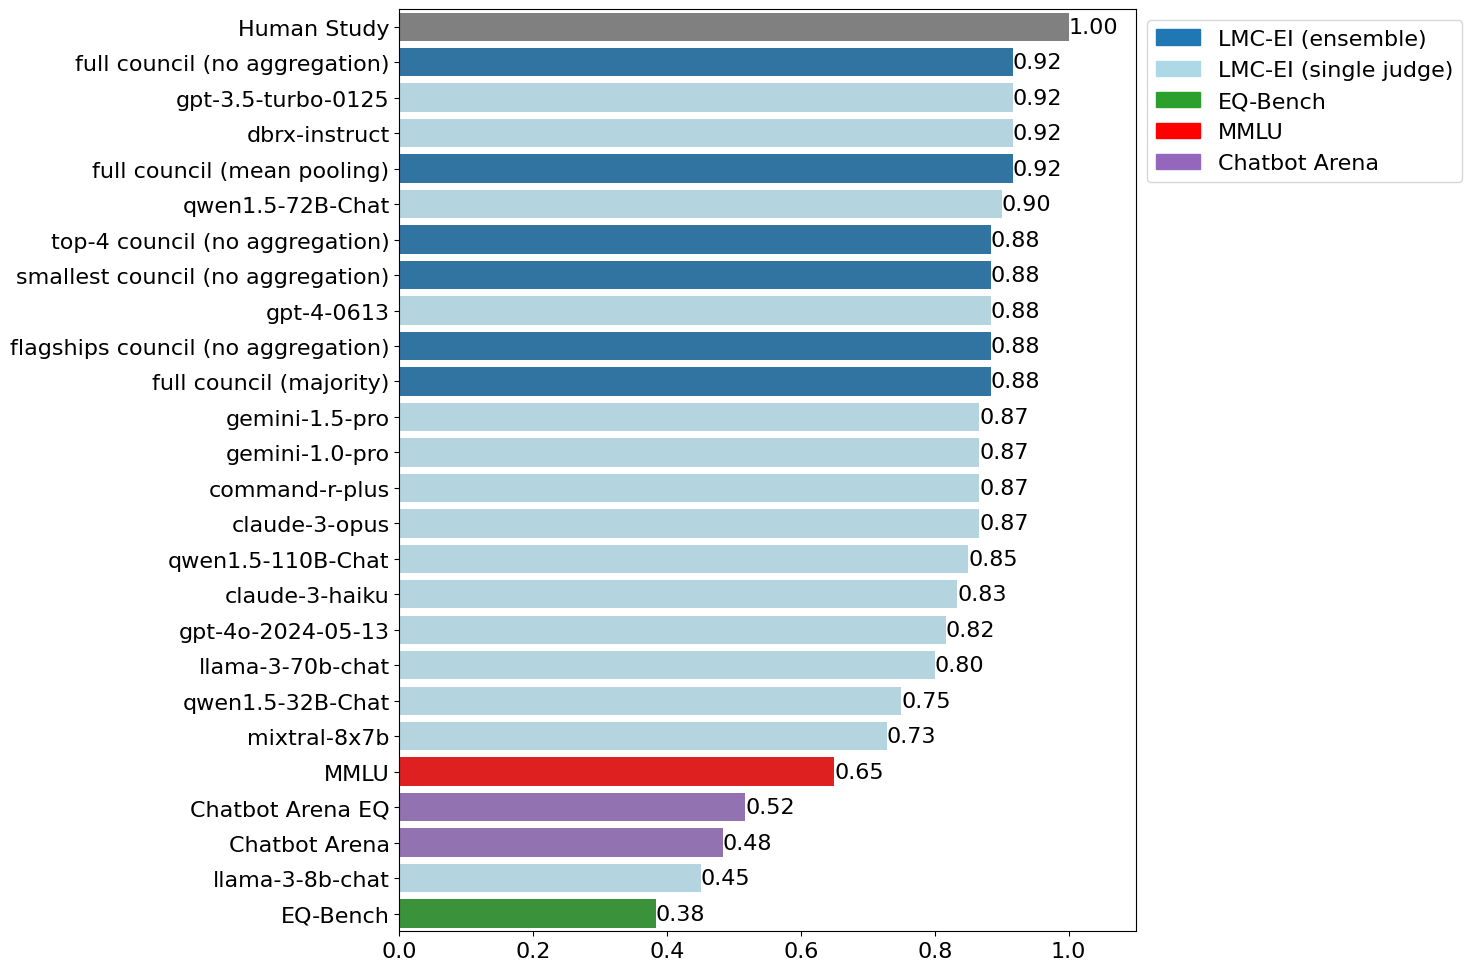

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Set global font size variable
font_size = 16
# Update global font size
plt.rcParams.update({'font.size': font_size})

# Sample data - replace this with your actual pandas Series
data = spearman_corr["Human Study"].sort_values(ascending=False)

# Define a color mapping function
def get_color(key):
    if "council" in key:
        return 'tab:blue'
    elif "Human Study" in key:
        # return "tab:blue"
        return "gray"
    elif "mined" in key:
        return "tab:purple"
    elif "EQ-Bench" in key:
        return 'tab:green'
    elif "MMLU" in key:
        return 'red'
    elif "Chatbot Arena" in key:
        return 'tab:purple'
    else:
        return 'lightblue'  # default color for other bars

# Apply the color mapping function to the index
colors = [get_color(key) for key in data.index]

# Create the bar plot with horizontal bars
plt.figure(figsize=(15, 10))  # Increase width to prevent cutoff
ax = sns.barplot(x=data.values, y=data.index, palette=colors)

# Add labels to each bar
for i in range(len(data)):
    ax.text(data.values[i], i, f'{data.values[i]:.2f}', color='black', ha='left', va='center')

# Set labels
plt.xlabel('')
plt.ylabel('')

# Adjust the horizontal axis limits to expand space (customize this as needed)
plt.xlim(0, data.max() * 1.1)  # Increased padding to 20% on the right

# Create a custom legend
legend_labels = {
    'LMC-EI (ensemble)': 'tab:blue',
    'LMC-EI (single judge)': 'lightblue',
    'EQ-Bench': 'tab:green',
    'MMLU': 'red',
    'Chatbot Arena': 'tab:purple',
}

# Create patches for each label
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1, 1), loc='upper left')

# Use tight layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.savefig("/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison_expanded.pdf")
plt.show()

/var/folders/0l/w386mdy110s1ks79j0qfrccc0000gn/T/ipykernel_99255/3379871736.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.values, y=data.index, palette=colors)


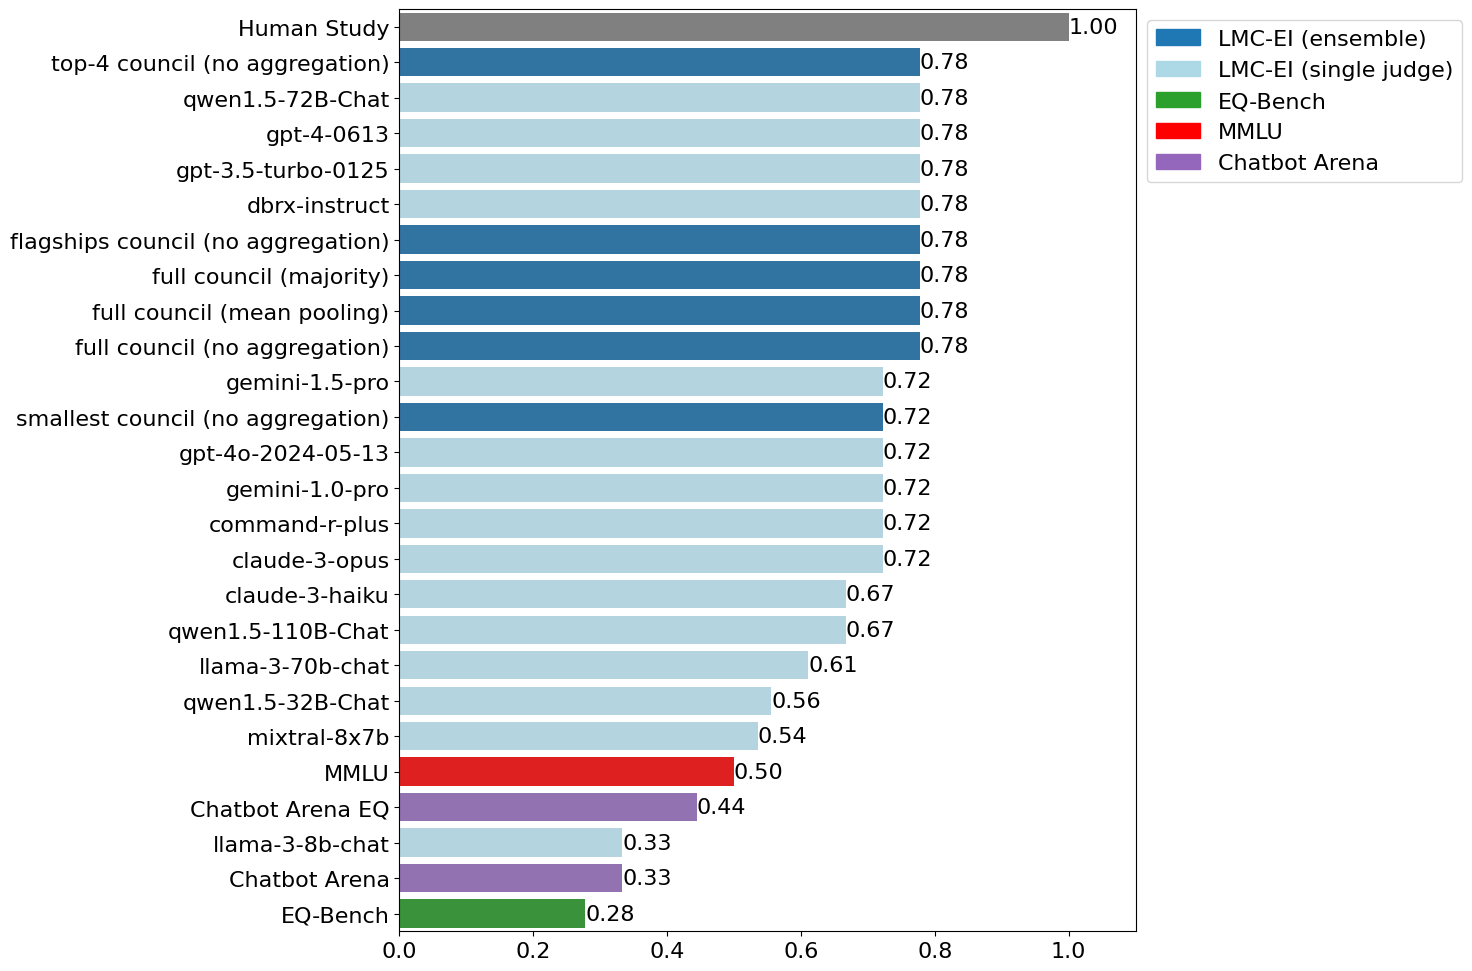

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Set global font size variable
font_size = 16
# Update global font size
plt.rcParams.update({'font.size': font_size})

# Sample data - replace this with your actual pandas Series
data = kendall_corr["Human Study"].sort_values(ascending=False)

# Define a color mapping function
def get_color(key):
    if "council" in key:
        return 'tab:blue'
    elif "Human Study" in key:
        # return "tab:blue"
        return "gray"
    elif "mined" in key:
        return "tab:purple"
    elif "EQ-Bench" in key:
        return 'tab:green'
    elif "MMLU" in key:
        return 'red'
    elif "Chatbot Arena" in key:
        return 'tab:purple'
    else:
        return 'lightblue'  # default color for other bars

# Apply the color mapping function to the index
colors = [get_color(key) for key in data.index]

# Create the bar plot with horizontal bars
plt.figure(figsize=(15, 10))  # Increase width to prevent cutoff
ax = sns.barplot(x=data.values, y=data.index, palette=colors)

# Add labels to each bar
for i in range(len(data)):
    ax.text(data.values[i], i, f'{data.values[i]:.2f}', color='black', ha='left', va='center')

# Set labels
plt.xlabel('')
plt.ylabel('')

# Adjust the horizontal axis limits to expand space (customize this as needed)
plt.xlim(0, data.max() * 1.1)  # Increased padding to 20% on the right

# Create a custom legend
legend_labels = {
    'LMC-EI (ensemble)': 'tab:blue',
    'LMC-EI (single judge)': 'lightblue',
    'EQ-Bench': 'tab:green',
    'MMLU': 'red',
    'Chatbot Arena': 'tab:purple',
}

# Create patches for each label
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]

# Add the legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1, 1), loc='upper left')

# Use tight layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.savefig("/Users/justinzhao/Repos/llm-council-public/analysis/leaderboard_comparison_expanded_kendall.pdf")
plt.show()